# Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns

from network import Net
from diff_equation import *

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

sns.set_theme()
torch.manual_seed(42)
np.random.seed(10)

# Training Data

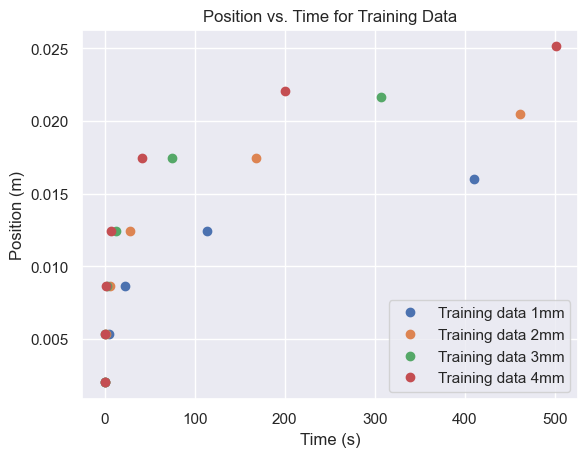

In [2]:
# Grab training data
dim_data = grab_training_data()

# Define legends for dimensionalized data
dim_legend = ['Training data 1mm', 'Training data 2mm', 'Training data 3mm', 'Training data 4mm']

# Functions to plot dimensionalized and nondimensionalized data
def plot_dim_data(show=True):
    for i in range(0, len(dim_data)):
        plt.plot(dim_data[i]['TIME'], dim_data[i]['DISTANCE'], 'o')
    plt.legend(dim_legend)
    plt.ylabel('Position (m)')
    plt.xlabel('Time (s)')
    plt.title('Position vs. Time for Training Data')
    if show:
        plt.show()

# Plot dimensionalized training data
plot_dim_data()

# Run the Model

Losses for 1mm droplet:
Epoch 1/10000, data loss: 345.8468322753906, physics loss: 0.009392396546900272
Epoch 2/10000, data loss: 325.2296447753906, physics loss: 0.008827480487525463
Epoch 3/10000, data loss: 305.26617431640625, physics loss: 0.008283982053399086
Epoch 4/10000, data loss: 285.9717712402344, physics loss: 0.0077594006434082985
Epoch 5/10000, data loss: 267.3533935546875, physics loss: 0.007252470124512911
Epoch 6/10000, data loss: 249.41998291015625, physics loss: 0.006762312259525061
Epoch 7/10000, data loss: 232.1898956298828, physics loss: 0.006295868661254644
Epoch 8/10000, data loss: 216.3135528564453, physics loss: 0.005862874910235405
Epoch 9/10000, data loss: 201.22694396972656, physics loss: 0.005450171884149313
Epoch 10/10000, data loss: 186.73141479492188, physics loss: 0.005055311135947704
Epoch 1000/10000, data loss: 0.01190971676260233, physics loss: 0.0024920650757849216
Epoch 2000/10000, data loss: 0.011800676584243774, physics loss: 0.00220842962153255

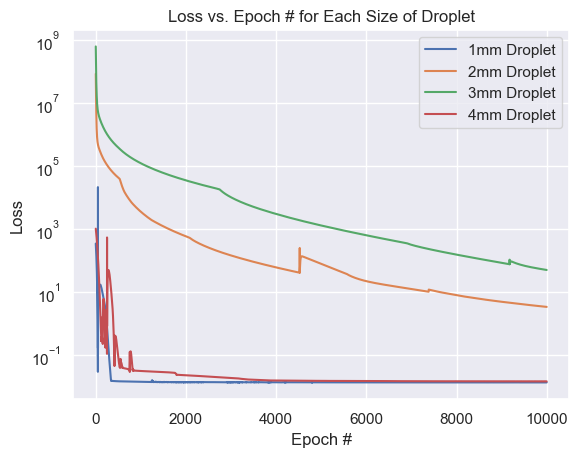

In [3]:
plt.yscale('log')
different_droplet_networks = [None] * len(dim_data)

'''
Train model for each droplet size, plot losses for each one.
Change the bounds on this loop and subsequent ones from '0', 'len(different_droplet_networks)' to '0', '1' to do only the 1mm droplet.
You can change the bounds similarly to only train the network for other-sized droplets.
'''
for i in range(0, len(different_droplet_networks)):
    different_droplet_networks[i] = Net(1, 1, droplet_size_idx=i, loss2=physics_loss_dim, epochs=10000, loss1_weight=100, loss2_weight=100, lr=1e-5).to(DEVICE)
    print(f'Losses for {i+1}mm droplet:')
    losses = different_droplet_networks[i].fit(np.array(dim_data[i]['TIME']), np.array(dim_data[i]['DISTANCE']))
    print()
    plt.plot(losses)
plt.legend(['1mm Droplet', '2mm Droplet', '3mm Droplet', '4mm Droplet'])
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch # for Each Size of Droplet')
plt.show()

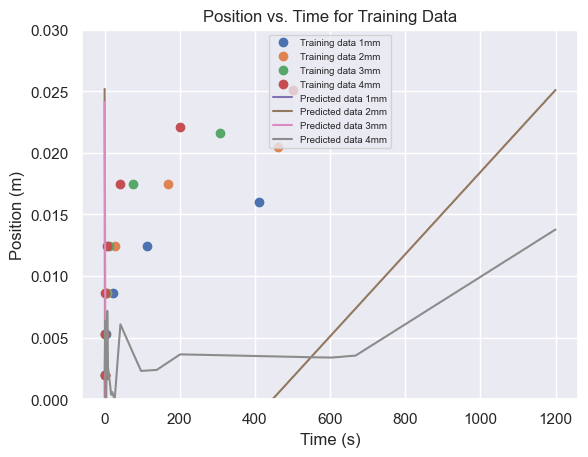

In [4]:
'''
Plot the dimensionalized data for each droplet as well as each respective dimensionalized model
'''

# Plot dimensionalized data
plot_dim_data(show=False)

# Use nondimensionalized model to make prediction
times = np.linspace(0, 1200, 1200)

# Plot dimensionalized model
for i in range(0, len(different_droplet_networks)):
    preds = different_droplet_networks[i].predict(times)
    plt.plot(times, preds)
    dim_legend.append(f'Predicted data {i+1}mm')
plt.legend(dim_legend, fontsize=7)
plt.ylim(0, 0.03)
plt.show()

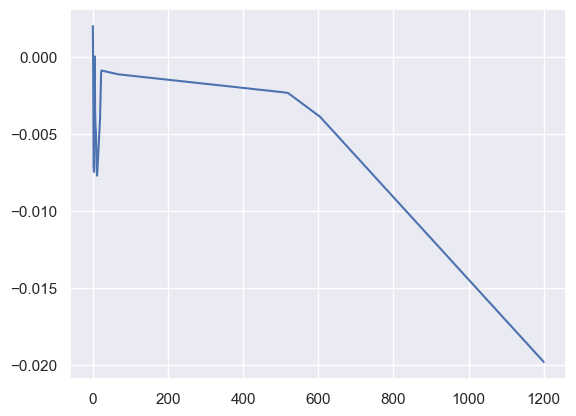

In [5]:
pred = different_droplet_networks[0].predict(times)
plt.plot(times, pred)
plt.show()